In [2]:
import pennylane as qml
import matplotlib.pyplot as plt
from pennylane import numpy as np
from scipy.linalg import expm

In [3]:
np.random.seed(143)
angles = np.linspace(0, 2 * np.pi, 50)
dev = qml.device('default.qubit', wires=2)

In [4]:
@qml.qnode(dev)
def rotation_circuit(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

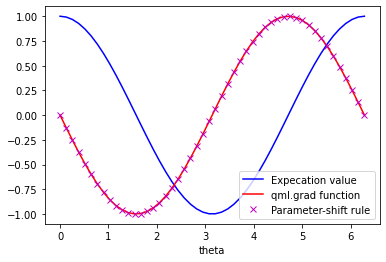

In [6]:
def param_shift(theta):
    # using the convention u=1/2
    r_plus = rotation_circuit(theta + np.pi / 2)
    r_minus = rotation_circuit(theta - np.pi / 2)
    return 0.5 * (r_plus - r_minus)

gradient = qml.grad(rotation_circuit, argnum=0)

expvals = [rotation_circuit(theta) for theta in angles]
grad_vals = [gradient(theta) for theta in angles]
param_shift_vals = [param_shift(theta) for theta in angles]
plt.plot(angles, expvals, 'b', label="Expecation value")
plt.plot(angles, grad_vals, 'r', label="qml.grad function")
plt.plot(angles, param_shift_vals, 'mx', label="Parameter-shift rule")
plt.xlabel("theta")
plt.legend()
plt.show()

In [25]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def rotation_circuit(vals, theta):
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.RZ(vals[0], wires = 0)
    qml.RZ(vals[1], wires = 1)
    qml.CNOT(wires = [1,0])
    qml.RY(theta, wires=0)
    exp1 = qml.expval(qml.PauliX(0))
    exp2 = qml.expval(qml.PauliX(1))
    return exp1, exp2

In [26]:
rotation_circuit([.14, .80], .2)

tensor([0.9704776 , 0.68989013], requires_grad=True)

In [36]:
def param_shift(vals, theta):
    # using the convention u=1/2
    r_plus = rotation_circuit(vals, theta + np.pi / 2)
    r_minus = rotation_circuit(vals, theta - np.pi / 2)
    return 0.5 * (r_plus - r_minus)

In [37]:
gradient = qml.grad(rotation_circuit, argnum=0)
# grad_vals = [gradient(theta) for theta in angles]
expvals = [rotation_circuit([.14, .80], theta) for theta in angles]
param_shift_vals = [param_shift([.14, .80], theta) for theta in angles]

param_shift_vals

[tensor([ 0.00000000e+00, -1.11022302e-16], requires_grad=True),
 tensor([-0.12662601,  0.        ], requires_grad=True),
 tensor([-2.51172826e-01,  1.11022302e-16], requires_grad=True),
 tensor([-3.71595391e-01, -3.33066907e-16], requires_grad=True),
 tensor([-4.85916370e-01, -5.55111512e-17], requires_grad=True),
 tensor([-0.59225861,  0.        ], requires_grad=True),
 tensor([-0.68887599,  0.        ], requires_grad=True),
 tensor([-0.77418204,  0.        ], requires_grad=True),
 tensor([-8.46776043e-01,  2.22044605e-16], requires_grad=True),
 tensor([-9.05466006e-01,  5.55111512e-17], requires_grad=True),
 tensor([-9.49288243e-01, -1.11022302e-16], requires_grad=True),
 tensor([-0.97752319,  0.        ], requires_grad=True),
 tensor([-0.98970724,  0.        ], requires_grad=True),
 tensor([-9.85640320e-01, -2.22044605e-16], requires_grad=True),
 tensor([-9.65389214e-01,  2.22044605e-16], requires_grad=True),
 tensor([-0.92928644,  0.        ], requires_grad=True),
 tensor([-0.8779

In [10]:
# X = tensor(0.98006658, requires_grad=True)
# Y = tensor(0., requires_grad=True)
# Z = tensor(-0.19866933, requires_grad=True)

NameError: name 'tensor' is not defined